In [15]:
import pandas as pd
import sympy as sp
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
import csv

In [14]:
data_col=['Population','Profit']
data = pd.read_csv('data.txt',header=-1,names=Data_col)

In [16]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


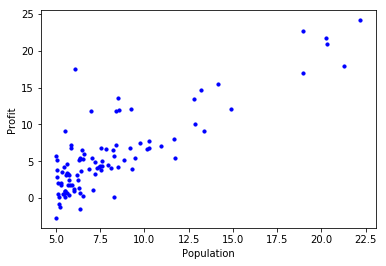

In [17]:
plt.scatter(Data.Population, Data.Profit,  color='blue',s=10)
plt.xlabel("Population")
plt.ylabel("Profit")
plt.show()

In [18]:
theta = np.random.rand()
alpha = 0.1
iterations = 1000

In [19]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [20]:
# append a ones column to the front of the data set
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [21]:
# convert from data frames to numpy matrices
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [22]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [39]:
#Value of cost function before optimaization
print("Value of cost function before optimization:")
computeCost(X, y, theta)

Value of cost function before optimization:


32.072733877455676

In [24]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [25]:
# initialize variables for learning rate and iterations
alpha = 0.01
iters = 1000

# perform gradient descent to "fit" the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [40]:
#Value of cost function after optimaization
print("Value of cost function after optimization:")
computeCost(X, y, g)

Value of cost function after optimization:


4.515955503078912

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

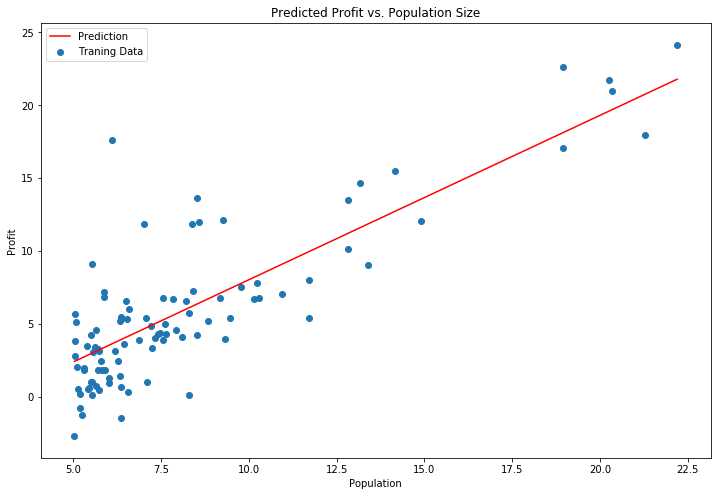

In [36]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Text(0.5, 1.0, 'Error vs. Training Epoch')

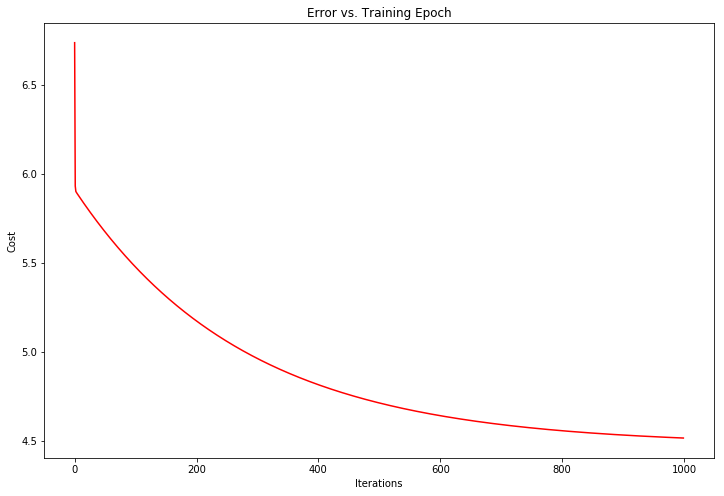

In [37]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [38]:
#prediction of values

print("The predicted values of prices when population is 35000= ",g[0, 0] + (g[0, 1] * 35000))
      
print("The predicted values of prices when population is 70000= ",g[0, 0] + (g[0, 1] * 70000))
      

The predicted values of prices when population is 35000=  39452.055682842176
The predicted values of prices when population is 70000=  78907.35276782863


# Value Prediction Using sklearn

Slope: [[2.93655106]]
Intercept: [2.55808002]
Root mean squared error:  0.07623324582875009
R2 score:  0.9038655568672764


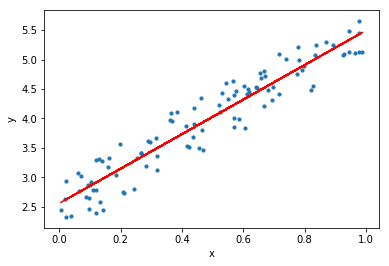

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# generate random data-set
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)

# sckit-learn implementation

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

### Predicted Profit when Population is 35000

In [11]:
print(regression_model.coef_*35000+regression_model.intercept_)

[[102781.84518716]]


### Predicted Profit when Population is 70000

In [10]:
print(regression_model.coef_*70000+regression_model.intercept_)

[[205561.13229429]]
